In [1]:
import pandas as pd
from tensorflow import keras

In [2]:
data = pd.read_csv("weather_prediction_dataset_light.csv")
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [ ]:
# when data is in different path
#import os

#filename = os.path.join("path....", "weather_prediction_dataset_light.csv")
#data = pd.read_csv(filename)

In [3]:
data.shape

(3654, 91)

In [4]:
data.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'DE_BILT_cloud_cover', 'DE_BILT_humidity', 'DE_BILT_pressure',
       'DE_BILT_global_radiation', 'DE_BILT_precipitation', 'DE_BILT_sunshine',
       'DE_BILT_temp_mean', 'DE_BILT_temp_min', 'DE_BILT_temp_max',
       'DRESDEN_cloud_cover', 'DRESDEN_humidity', 'DRESDEN_global_radiation',
       'DRESDEN_precipitation', 'DRESDEN_sunshine', 'DRESDEN_temp_mean',
       'DRESDEN_temp_min', 'DRESDEN_temp_max', 'DUSSELDORF_cloud_cover',
       'DUSSELDORF_humidity', 'DUSSELDORF_pressure',
       'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation',
       'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min',
       'DUSSELDORF_temp_max', 'HEATHROW_cloud_cover', 'HEATHROW_humidity',
       'HEATHROW_pressure', 'HEATHROW_global_radiation',
       'HEATH

In [5]:
import re

pattern = r'[A-Z_]'
feature_types = {re.sub(pattern, '', col) for col in data.columns}
feature_types

{'',
 'cloudcover',
 'globalradiation',
 'humidity',
 'precipitation',
 'pressure',
 'sunshine',
 'tempmax',
 'tempmean',
 'tempmin'}

In [6]:
data.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,-4.626327,-6.884319,-2.352244,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,6.987080,7.120333,6.972886,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-26.600000,-30.300000,-24.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,-9.400000,-11.800000,-7.100000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,-4.400000,-6.400000,-2.200000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,0.700000,-1.100000,2.700000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,13.800000,8.700000,14.300000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


In [8]:
# define the data
X_data = data.loc[:365*3].drop(columns=['DATE', 'MONTH'])

# define labels (sunshine hours for the next day)
y_data = data.loc[1:(365*3 + 1)]["BASEL_sunshine"]

X_data.shape, y_data.shape

((1096, 89), (1096,))

In [9]:
X_data.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,DE_BILT_cloud_cover,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,7,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,8,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,7,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,3,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [10]:
from sklearn.model_selection import train_test_split

# 70% data --> training set
# 15% --> validation set
# 15% --> test set
X_train, X_not_train, y_train, y_not_train = train_test_split(X_data, y_data,
                                                              test_size=0.3,
                                                              random_state=0)
X_val, X_test, y_val, y_test = train_test_split = train_test_split(X_not_train,
                                                                  y_not_train,
                                                                  test_size=0.5,
                                                                  random_state=0)


In [11]:
X_train.shape, X_val.shape, X_test.shape

((767, 89), (164, 89), (165, 89))

In [12]:
X_train.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,DE_BILT_cloud_cover,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
458,7,0.73,1.0194,0.73,0.00,0.0,11.0,7.8,13.9,6,...,-1.8,-4.0,0.5,0.68,1.0161,1.36,0.46,13.1,9.9,16.3
181,2,0.54,1.0154,3.24,0.00,12.9,18.8,10.4,26.0,3,...,0.9,-2.1,3.8,0.74,1.0134,2.59,0.00,19.9,13.9,25.9
427,7,0.91,0.9929,0.28,1.47,0.0,1.5,0.8,2.5,5,...,-10.3,-15.7,-4.9,0.89,0.9913,0.40,0.52,4.0,1.9,6.0
815,1,0.64,1.0274,2.14,0.00,10.9,3.0,-3.4,9.3,6,...,-14.6,-15.5,-13.6,0.66,1.0277,1.92,0.00,6.4,-0.2,12.9
9,8,0.91,1.0337,0.06,0.09,0.0,2.4,1.4,3.8,3,...,-13.3,-15.0,-11.6,0.94,1.0369,0.58,0.04,1.8,-1.5,5.0


In [13]:
y_train.head()

459     1.0
182     9.6
428     0.0
816    10.2
10      0.0
Name: BASEL_sunshine, dtype: float64

## Build a neural network

In [ ]:
# input layer: keras.layers.Input(shape(,))

# dense layer: keras.layers.Dense(#of_nodes, activation="relu")(layer_before)

# output layer ?

In [17]:
def create_nn(nodes1, nodes2):
    inputs = keras.layers.Input(shape=(X_data.shape[1], ))

    layers_dense = keras.layers.Dense(nodes1, activation='relu')(inputs)
    layers_dense = keras.layers.Dense(nodes2, activation='relu')(layers_dense)

    outputs = keras.layers.Dense(1)(layers_dense)

    return keras.models.Model(inputs=inputs, outputs=outputs,
                              name='sunshine_preditor')

model = create_nn(100, 50)
model.summary()

Model: "sunshine_preditor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 89)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               9000      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 14,101
Trainable params: 14,101
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss=keras.losses.MeanSquaredError(),
             optimizer=keras.optimizers.Adam(),
             metrics=[keras.metrics.RootMeanSquaredError()])

In [22]:
history = model.fit(X_train, y_train,
                   epochs=200)

Epoch 1/200
24/24 [==============================] - 3s 12ms/step - loss: 27.2230 - root_mean_squared_error: 5.1595
Epoch 2/200
24/24 [==============================] - 0s 10ms/step - loss: 14.7104 - root_mean_squared_error: 3.8332
Epoch 3/200
24/24 [==============================] - 0s 9ms/step - loss: 13.2647 - root_mean_squared_error: 3.6413
Epoch 4/200
24/24 [==============================] - 0s 7ms/step - loss: 12.2870 - root_mean_squared_error: 3.5046
Epoch 5/200
24/24 [==============================] - 0s 11ms/step - loss: 11.7683 - root_mean_squared_error: 3.4294
Epoch 6/200
24/24 [==============================] - 0s 14ms/step - loss: 11.3879 - root_mean_squared_error: 3.3733 0s - loss: 11.4138 - root_mean_squared_error: 
Epoch 7/200
24/24 [==============================] - 0s 16ms/step - loss: 11.4527 - root_mean_squared_error: 3.3829 0s - loss: 12.4300 - root_mean_squared_e
Epoch 8/200
24/24 [==============================] - 0s 9ms/step - loss: 10.8690 - root_mean_squared_e

<AxesSubplot:ylabel='root_mean_squared_error'>

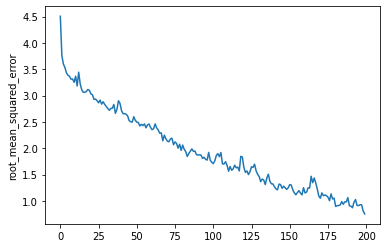

In [24]:
import seaborn as sns

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df['root_mean_squared_error'])

In [25]:
y_predicted = model.predict(X_train)

In [27]:
y_predicted.shape

(767, 1)

In [28]:
y_predicted[:10]

array([[ 1.6510972 ],
       [ 8.508522  ],
       [ 0.07474242],
       [10.743462  ],
       [-0.01932879],
       [ 3.2672842 ],
       [11.079063  ],
       [ 8.408051  ],
       [ 0.1014282 ],
       [ 2.885145  ]], dtype=float32)

Text(0, 0.5, 'true sunshine')

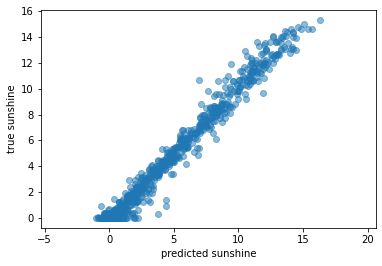

In [32]:
from matplotlib import pyplot as plt

plt.scatter(y_predicted, y_train, alpha=0.5)
plt.axis("equal")
plt.xlabel("predicted sunshine")
plt.ylabel("true sunshine")

Text(0, 0.5, 'true sunshine')

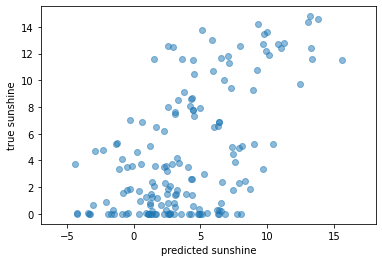

In [34]:
y_test_predicted = model.predict(X_test)

plt.scatter(y_test_predicted, y_test, alpha=0.5)
plt.axis("equal")
plt.xlabel("predicted sunshine")
plt.ylabel("true sunshine")

In [35]:
model.layers

In [36]:
model.summary()

Model: "sunshine_preditor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 89)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               9000      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 14,101
Trainable params: 14,101
Non-trainable params: 0
_________________________________________________________________


In [38]:
#model.weights